In [117]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\heart_attack_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\heart_attack_project\healthcare-dataset-stroke-data.csv


In [118]:
df = pd.read_csv("C:/אריאל נושאי לימוד/מבוא למדעי הנתונים/KAGGLE/heart_attack_project/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Features

#### ) id: unique identifier

#### 2) gender: "Male", "Female" or "Other"

#### 3) age: age of the patient

#### 4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

#### 5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

#### 6) ever_married: "No" or "Yes"

#### 7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

#### 8) Residence_type: "Rural" or "Urban"

#### 9) avg_glucose_level: average glucose level in blood

#### 10) bmi: body mass index

#### 11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

#### 12) stroke: 1 if the patient had a stroke or 0 if not

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### null values only in bmi feature

In [121]:
def bar_chart(feature):
    had_stroke = df[df['stroke']==1][feature].value_counts()
    no_stroke = df[df['stroke']==0][feature].value_counts()
    df1 = pd.DataFrame([had_stroke,no_stroke])
    df1.index = ['had stroke','didnt have stroke']
    df1.plot(kind='bar',stacked=True ,figsize=(10,5))

#### a function to create bar charts

In [122]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

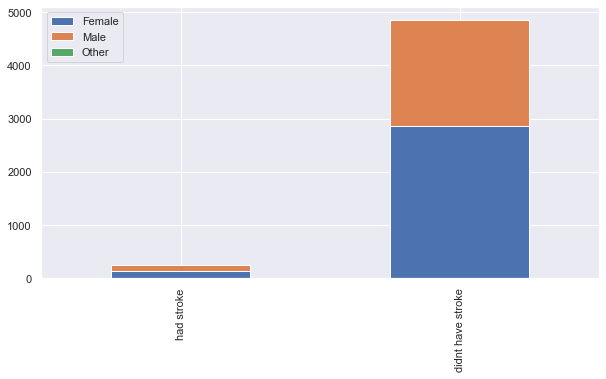

In [123]:
bar_chart('gender')

#### roughly the same amount of females and males had a stroke, more females than males hadn't had a stroke

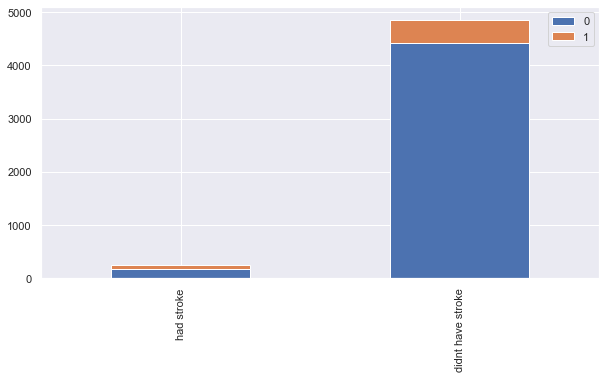

In [124]:
bar_chart('hypertension')

#### if you don't have hypertension you most likely will not have a stroke, if you do have it, there's a higher chance for you to have a stroke  

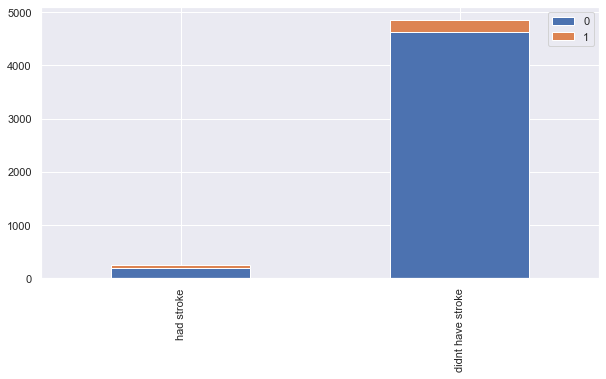

In [125]:
bar_chart('heart_disease')

#### the chance to have a stroke is way higher if you have heart diseases

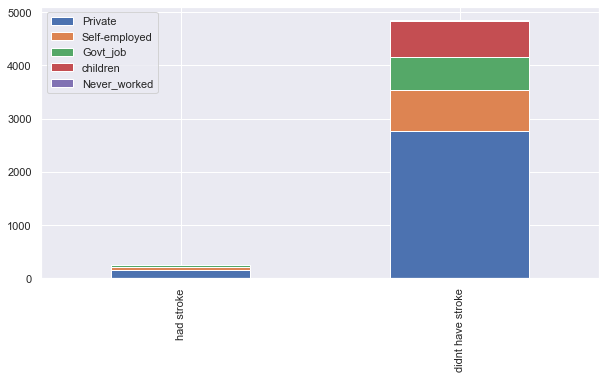

In [126]:
bar_chart('work_type')

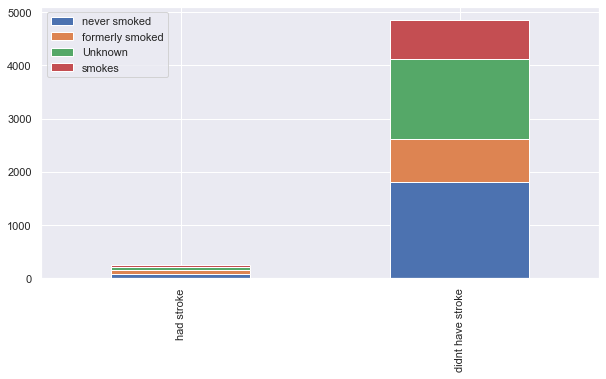

In [127]:
bar_chart('smoking_status')

# clean the data

#### only one person described as "other" in the gender feature so i'll remove it

In [128]:
df = df[df['gender'] != 'Other']

### let's convert each value of every categorial attribute in the dataframe to a column using "get_dummies".

In [129]:
og_df = df.copy()
df = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
df

,id,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,202.21,NaN,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,105.92,32.5,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,174.12,24.0,1,1,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,83.75,NaN,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,125.20,40.0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,82.99,30.6,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,166.29,25.6,0,0,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0


## finding correlations between the features and the target

### let's look at the correlation between the chance of having a stroke and different features

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


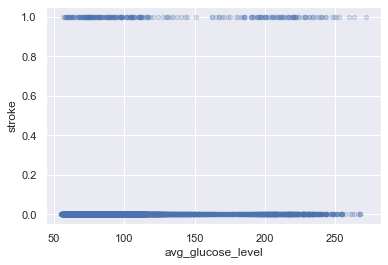

In [139]:
df.plot(kind='scatter', x='avg_glucose_level', y='stroke')

#### looks like the average glucose level of most people who had a stroke wasn't around the average value. it was either too low or too high.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


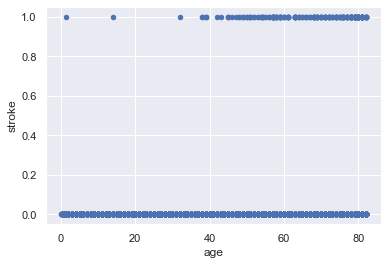

In [140]:
df.plot(kind='scatter', x='age', y='stroke')

#### we get some really useful information from this graph, looks like there are all most no people under the age of 40 that had a stroke. the chance of having a stroke increases a you age.

In [ ]:
df.plot(kind='scatter', x='age', y='stroke')

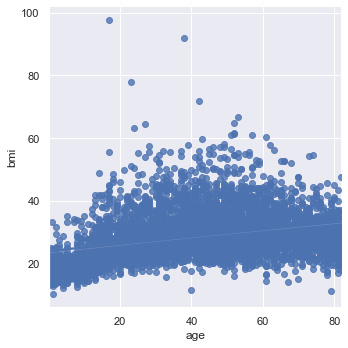

In [137]:
g = sns.lmplot(data=no_null, x="age", y="bmi")

In [ ]:
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=5
)